In [1]:
############################################
##### decide which real machine to use #####
############################################
backend_name = 'ibm_kawasaki'

############################
##### import libraries #####
############################
%matplotlib inline
%load_ext autoreload
%autoreload 2


from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, compiler, circuit, compiler
from pytket.extensions.qiskit import IBMQBackend, AerBackend
import matplotlib.pyplot as plt
import numpy as np
import math
import time
import sys
sys.path.append('../../../aqcel_dev/aqcel_dev')
import aqcel_dev as icepp
sys.path.append('../')
sys.path.append('../qiskit_legacy')
sys.path.append('../qiskit_code')

import QuantumPartonShower as qps
import QuantumPartonShower_ReM as qpsc
import QuantumPartonShower_ReM_2step_hardcode as qps_rhs
import plotting as pl
from PaperPlots import MakeObservables as mo

sim_b = AerBackend()

Number of emissions: 1
log(theta_max): -5.180816459236603
Number of emissions: 1
log(theta_max): -1.7269388197455342
Number of emissions: 2
log(theta_max): -1.7269388197455342
Number of emissions: 1
log(theta_max): -3.4538776394910684


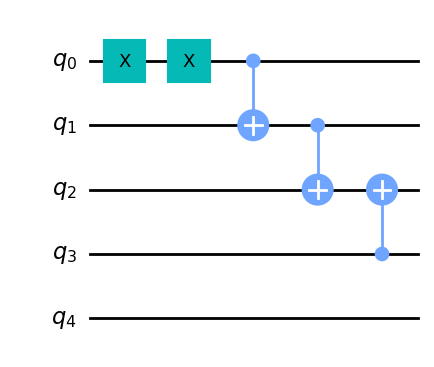

In [19]:
import numpy as np
from qiskit import QuantumCircuit

# 量子ビットの数
n_qubits = 5

# 量子回路の初期化
qc = QuantumCircuit(n_qubits)

qc.x(0)
qc.x(0)
qc.cx(0,1)
qc.cx(1,2)
qc.cx(3,2)

qc0 = qc
# 量子回路を表示
qc.draw('mpl')



In [20]:
#######################
##### apply aqcel #####
#######################

# AQCELにかかる時間を測定開始
start_time = time.time()

# AQCELのapply
target_qc = qc0
aqcel_results_cc = icepp.pass_manager(target_qc, level=2, backend_tket=sim_b, shots=1024, measure_type='cc').auto_manager()
result_qc = aqcel_results_cc[0]

# AQCEL適用にかかった時間をprint
end_time = time.time()
execution_time = end_time - start_time
print(f"実行時間: {execution_time}秒")

実行時間: 0.08861255645751953秒


Before AQCEL


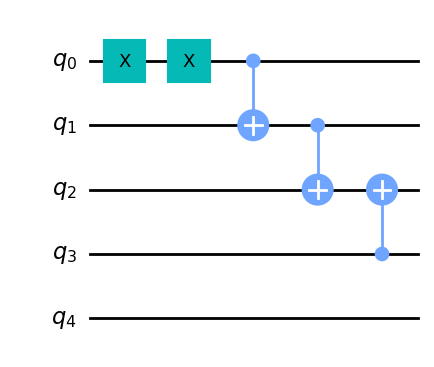

In [21]:
#############################
##### Before AQCEL(qc1) #####
#############################
print('Before AQCEL')
target_qc.draw('mpl')

In [22]:
target_qc.depth()

5

Before AQCEL
 - Number of gate : OrderedDict([('cx', 3), ('x', 2)])
 - Depth of all : 5


After AQCEL
 - Number of gate : OrderedDict()
 - Depth of all :0


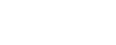

In [23]:
#############################
##### Before AQCEL(qc1) #####
#############################
print('Before AQCEL')
print(f' - Number of gate : {target_qc.count_ops()}')
print(f' - Depth of all : {target_qc.depth()}')# 1から始めてmeasurementは含めないで数えてくれる
print('')
print('')


############################
##### After AQCEL(qc2) #####
############################
print('After AQCEL')
print(f' - Number of gate : {result_qc.count_ops()}')
print(f' - Depth of all :{result_qc.depth()}')# 1から始めてmeasurementは含めないで数えてくれる


result_qc.draw('mpl', fold=100)

In [16]:
###########################
##### Define depth_ls #####
###########################
depth_ls = aqcel_results_cc[2]
print(f'depth_ls : {depth_ls}')

############################
##### Define depth_tof #####
############################
depth_tof = aqcel_results_cc[3]
print(f'depth_tof : {depth_tof}')

#############################
##### Define depth_cnot #####
#############################
depth_cnot = aqcel_results_cc[4]
print(f'depth_cnot : {depth_ls}')

depth_ls : [1, 2, 3]
depth_tof : []
depth_cnot : [1, 2, 3]


x: [0, 1, 2, 3]
Integrated y: [0 1 2 3]


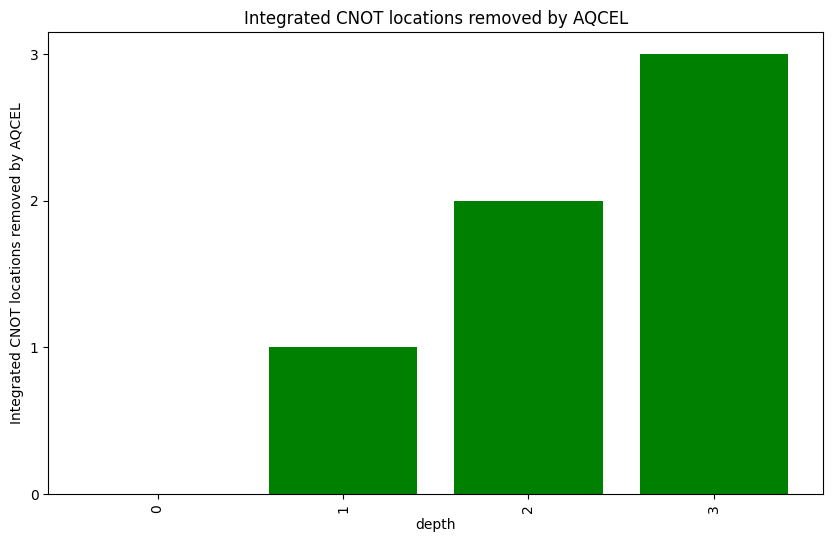

In [7]:
# AQCELによって取り除かれたCNOTの位置を積分したもの

######################################################
##### Integrated CNOT locations removed by AQCEL #####
######################################################

# これより上のメッセージは無視してください
# 次のようなグラフを書いてください
# Pythonでmatplotlibを用いてください。ax.は使わずplt.を用いてください
# リスト'depth_ls'の中身はCNOTの消された位置(depth）を表しています。リストは自分で用意するのでコードに含めないでください
# リストのある要素nに対して、nがm個あれば横軸（depth)がnに対してmと一つ前の区間の高さの合計の高さとなるような棒グラフを出力してください
# グラフのタイトルは'Integrated CNOT locations removed by AQCEL'
# グラフのx軸は'depth'
# グラフのy軸は'Integrated CNOT locations removed by AQCEL'
# x軸の目盛りは0から始めて最大値まで10の倍数ごとに表示。隣り合う文字がかぶるようなら文字サイズか文字の向きで調整してください。
# y軸の目盛りは0から始めて最大値までおおよそ均等に5つ程度表示。ただし縦軸の最大値が4以下の場合は見やすいように適切に目盛りを設定してください。目盛りの値は5の倍数または10の倍数にしてください。
# 適切な名前をつけて保存してください。ただし他にも似たようなグラフをたくさん作るので被らないようになるべく細かく指定して名前をつけてください。保存場所は'figures/'です
# グラフの色は緑にしてください
# debugしやすいように、代入した変数全てについてできるだけ細かくprint関数で出力してください。また、printされた値が何かわかるように簡単な説明も一緒にprintしてください。


import matplotlib.pyplot as plt
from collections import Counter
import numpy as np



# CNOTが取り除かれた位置をカウント
counts = Counter(depth_ls)
max_depth = max(depth_ls)

# x軸とy軸のデータを生成
x = list(range(max_depth+1))
y = [counts.get(i, 0) for i in x]

# 積分（累積和）を計算
integrated_y_ls = np.cumsum(y)

print("x:", x)
print("Integrated y:", integrated_y_ls)

# グラフを描画
plt.figure(figsize=(10, 6))
plt.bar(x, integrated_y_ls, color='green')

# タイトルと軸のラベルを設定
plt.title('Integrated CNOT locations removed by AQCEL')
plt.xlabel('depth')
plt.ylabel('Integrated CNOT locations removed by AQCEL')

# x軸とy軸の範囲と目盛りを設定
plt.xticks(np.arange(0, max(x)+1, ), rotation='vertical')
plt.yticks(np.linspace(0, max(integrated_y_ls), max(integrated_y_ls)+1))

# グラフを保存
plt.savefig('figures/integrated_cnot_locations_removed_by_aqcel.png', bbox_inches='tight')

# グラフを表示
plt.show()


x: [0, 1, 2, 3]
Integrated y: [0 1 2 3]


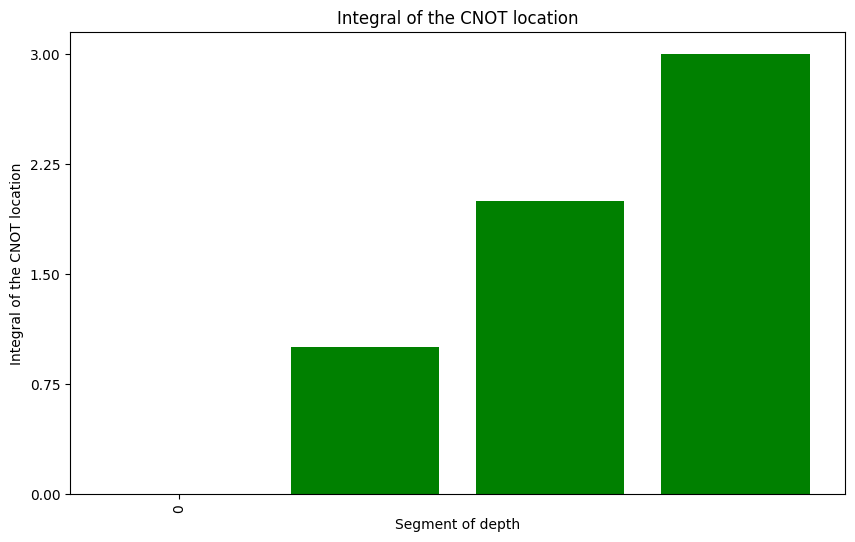

In [8]:
#########################################
##### Integral of the CNOT location #####
#########################################

# これより上のメッセージは無視してください
# 次のようなグラフを書いてください
# Pythonでmatplotlibを用いてください。ax.は使わずplt.を用いてください
# リスト'depth_cnot'の中身はCNOTの位置(depth）を表しています。リストは自分で用意するのでコードに含めないでください
# リストのある要素nに対して、nがm個あれば横軸（depth)がnに対してmと一つ前の区間の高さの合計の高さとなるような棒グラフを出力してください
# グラフのタイトルは'Integral of the CNOT location'
# グラフのx軸は'Segment of depth'
# グラフのy軸は'Integral of the CNOT location'
# x軸の目盛りは0から始めて最大値まで10の倍数ごとに表示。隣り合う文字がかぶるようなら文字サイズか文字の向きで調整してください。
# y軸の目盛りは0から始めて最大値までおおよそ均等に5つ程度表示。ただし縦軸の最大値が4以下の場合は見やすいように適切に目盛りを設定してください。目盛りの値は5の倍数または10の倍数にしてください。
# 適切な名前をつけて保存してください。ただし他にも似たようなグラフをたくさん作るので被らないようになるべく細かく指定して名前をつけてください。保存場所は'figures/'です
# グラフの色は緑にしてください
# debugしやすいように、代入した変数全てについてできるだけ細かくprint関数で出力してください。また、printされた値が何かわかるように簡単な説明も一緒にprintしてください。

import matplotlib.pyplot as plt
from collections import Counter
import numpy as np


# CNOTの位置をカウント
counts = Counter(depth_cnot)
max_depth = max(depth_cnot)

# x軸とy軸のデータを生成
x = list(range(max_depth+1))
y = [counts.get(i, 0) for i in x]

# 積分（累積和）を計算
integrated_y_cnot = np.cumsum(y)

print("x:", x)
print("Integrated y:", integrated_y_cnot)

# グラフを描画
plt.figure(figsize=(10, 6))
plt.bar(x, integrated_y_cnot, color='green')

# タイトルと軸のラベルを設定
plt.title('Integral of the CNOT location')
plt.xlabel('Segment of depth')
plt.ylabel('Integral of the CNOT location')

# x軸とy軸の範囲と目盛りを設定
plt.xticks(np.arange(0, max(x)+1, 10), rotation='vertical')
plt.yticks(np.linspace(0, max(integrated_y_cnot), 5))

# グラフを保存
plt.savefig('figures/integral_of_cnot_location.png', bbox_inches='tight')

# グラフを表示
plt.show()


x: [0, 1, 2, 3]
y: [nan  1.  1.  1.]


/tmp/ipykernel_31106/4228500651.py:25: RuntimeWarning: invalid value encountered in divide
  y = np.array(integrated_y_ls) / np.array(integrated_y_cnot)


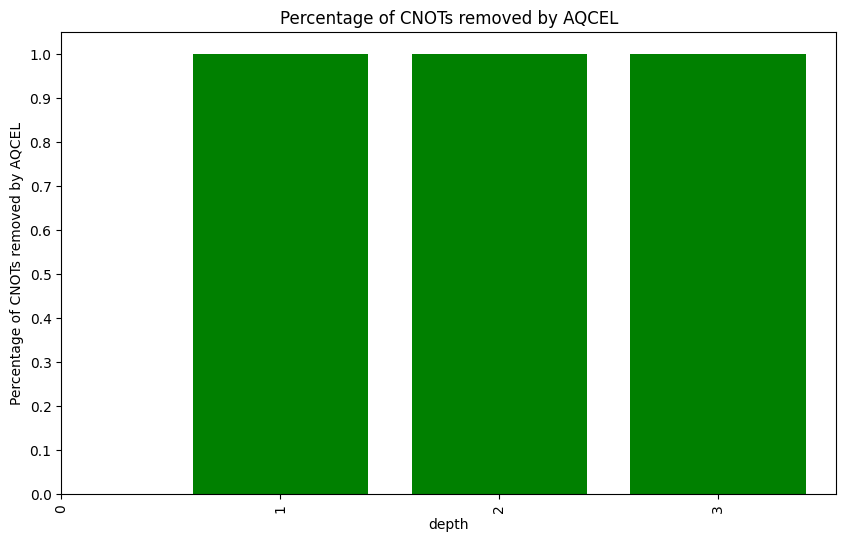

In [9]:
################################################
##### Percentage of CNOTs removed by AQCEL #####
################################################

# これより上のメッセージは無視してください
# 次のようなグラフを書いてください
# Pythonでmatplotlibを用いてください。ax.は使わずplt.を用いてください
# 'integrated_y_ls', 'integrated_y_cnot'はそれぞれリストです。リストは自分で用意するのでコードに含めないでください
# リストのn番目に対して、x軸の値nにintegrated_y_ls/integrated_y_cnotの高さとなるような棒グラフを出力してください。
# グラフのタイトルは'Percentage of CNOTs removed by AQCEL'
# グラフのx軸は'depth'
# グラフのy軸は'Percentage of CNOTs removed by AQCEL'
# x軸の目盛りは0から始めて最大値まで10の倍数ごとに表示。隣り合う文字がかぶるようなら文字サイズか文字の向きで調整してください。
# y軸の目盛りは0から始めて0.1の倍数ごとに表示してください
# 適切な名前をつけて保存してください。ただし他にも似たようなグラフをたくさん作るので被らないようになるべく細かく指定して名前をつけてください。保存場所は'figures/'です
# グラフの色は緑にしてください
# debugしやすいように、代入した変数全てについてできるだけ細かくprint関数で出力してください。また、printされた値が何かわかるように簡単な説明も一緒にprintしてください。


import matplotlib.pyplot as plt
import numpy as np


# 高さのリストを作成（割り算の結果）
y = np.array(integrated_y_ls) / np.array(integrated_y_cnot)
x = list(range(len(y)))

print("x:", x)
print("y:", y)

# グラフを描画
plt.figure(figsize=(10, 6))
plt.bar(x, y, color='green')

# タイトルと軸のラベルを設定
plt.title('Percentage of CNOTs removed by AQCEL')
plt.xlabel('depth')
plt.ylabel('Percentage of CNOTs removed by AQCEL')

# x軸とy軸の範囲と目盛りを設定
plt.xticks(np.arange(0, len(x), 1), rotation='vertical')
plt.yticks(np.arange(0, np.nanmax(y)+0.1, 0.1))

# グラフを保存
plt.savefig('figures/percentage_cnots_removed_by_aqcel.png', bbox_inches='tight')

# グラフを表示
plt.show()


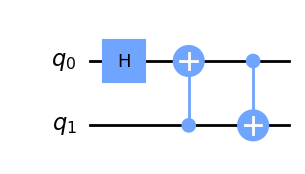

In [10]:
from qiskit.circuit.library.standard_gates import XGate, CXGate
from qiskit import QuantumCircuit

# 既存の量子回路の初期化
new_qc = QuantumCircuit(2)
new_qc.h(0)
new_qc.cx(1,0)
new_qc.cx(0,1)

# 現在考慮しているゲートの深さ
depth_num = 0

# 現在考慮しているゲートの情報
gate = [CXGate(), [0, 1], []]  # CNOTゲート、操作対象の量子ビットは0と1、古典ビットはなし

# 現在の量子ビットの状態
bitstrings = ['0']

# ゲートが追加されるたびに深さを記録するリスト
depth_ls = []

# Toffoliゲートが追加されるたびに深さを記録するリスト
depth_ls_tof = []

# CNOTゲートが考慮されるたびに深さを記録するリスト
depth_cnot = []


def judge(new_qc, depth_num, gate, bitstrings, depth_ls, depth_ls_tof, depth_cnot):
    target_qubit = gate[1][-1]#ターゲットqubitの番号を取り出す

    """
    gate[0] : gate class
    gate[1] : qregs
    gate[2] : cregs
    """        

    #以下ではToffoli gateかCNOT gateかで分類して作業している

    # Toffoli gates
    if gate[0].name in ['ccx', 'rccx']:

        if '11' in bitstrings: #controlled qubitが1だったら変わりにgateをかける  #11が含まれている時点でidentity
            if len(bitstrings) == 1: #lenは1から始まる。listの要素数。他に測定されたものがない場合。
                new_qc.append(XGate(label=None), [target_qubit], gate[2])
                depth_ls.append(new_qc.depth())

            elif '10' not in bitstrings: #他にあるけども10がなければCNOTにしか最適化できないのでCNOTにしかできない
                new_qc.append(XGate(label=None).control(1), [gate[1][1], target_qubit], gate[2])
                depth_ls_tof.append(new_qc.depth())

            elif '01' not in bitstrings:#他にあるけども01がなければCNOTにしか最適化できないのでCNOTにしかできない
                new_qc.append(XGate(label=None).control(1), [gate[1][0], target_qubit], gate[2])
                depth_ls_tof.append(new_qc.depth())

            else: #11と00の時だけようにもう一つ作る？(Qubit connectionを一つ減らせる)
                new_qc.append(gate[0],gate[1],gate[2])#この場合は消せない場合

        else:#controlled qubitが0だったら消せる
            depth_ls.append(depth_num)
            pass # Delete CCX

    # Two-qubit gates
    else:
        depth_cnot.append(depth_num)
        if '1' in bitstrings: #controlled qubitが1だったら変わりにgateをかける
            if '0' not in bitstrings:
                new_qc.append(gate[0].base_gate, [target_qubit], gate[2])#.base_gateで元のgateと同じクラスを指定できる
                depth_ls.append(depth_num)
            else:
                new_qc.append(gate[0],gate[1],gate[2])
                # depth_ls.append(depth_num)
        else:#controlled qubitが0だったら消せる
            depth_ls.append(depth_num)
            pass # Delete CU

    return [new_qc, depth_ls, depth_ls_tof, depth_cnot]

judge(new_qc, depth_num, gate, bitstrings, depth_ls, depth_ls_tof, depth_cnot)[0].draw('mpl')

# [new_qc, [0], [], [0]]


In [11]:
judge(new_qc, depth_num, gate, bitstrings, depth_ls, depth_ls_tof, depth_cnot)

 [0, 0],
 [],
 [0, 0]]

In [12]:
def judge(new_qc, depth_num, gate, bitstrings, depth_ls, depth_ls_tof, depth_cnot):
    target_qubit = gate[1][-1]#ターゲットqubitの番号を取り出す

    """
    gate[0] : gate class
    gate[1] : qregs
    gate[2] : cregs
    """        

    #以下ではToffoli gateかCNOT gateかで分類して作業している

    # Toffoli gates
    if gate[0].name in ['ccx', 'rccx']:

        if '11' in bitstrings: #controlled qubitが1だったら変わりにgateをかける  #11が含まれている時点でidentity
            if len(bitstrings) == 1: #lenは1から始まる。listの要素数。他に測定されたものがない場合。
                new_qc.append(XGate(label=None), [target_qubit], gate[2])
                depth_ls.append(new_qc.depth())

            elif '10' not in bitstrings: #他にあるけども10がなければCNOTにしか最適化できないのでCNOTにしかできない
                new_qc.append(XGate(label=None).control(1), [gate[1][1], target_qubit], gate[2])
                depth_ls_tof.append(new_qc.depth())

            elif '01' not in bitstrings:#他にあるけども01がなければCNOTにしか最適化できないのでCNOTにしかできない
                new_qc.append(XGate(label=None).control(1), [gate[1][0], target_qubit], gate[2])
                depth_ls_tof.append(new_qc.depth())

            else: #11と00の時だけようにもう一つ作る？(Qubit connectionを一つ減らせる)
                new_qc.append(gate[0],gate[1],gate[2])#この場合は消せない場合

        else:#controlled qubitが0だったら消せる
            depth_ls.append(depth_num)
            pass # Delete CCX

    # Two-qubit gates
    else:
        depth_cnot.append(depth_num)
        if '1' in bitstrings: #controlled qubitが1だったら変わりにgateをかける
            if '0' not in bitstrings:
                new_qc.append(gate[0].base_gate, [target_qubit], gate[2])#.base_gateで元のgateと同じクラスを指定できる
                depth_ls.append(depth_num)
            else:
                new_qc.append(gate[0],gate[1],gate[2])
                # depth_ls.append(depth_num)
        else:#controlled qubitが0だったら消せる
            depth_ls.append(depth_num)
            pass # Delete CU

    return [new_qc, depth_ls, depth_ls_tof, depth_cnot]

from qiskit.circuit.library.standard_gates import XGate, CXGate, CCXGate
from qiskit import QuantumCircuit

# 初期の量子回路を作成
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.cx(1,0)
qc.mcx([0,1],2)

# ゲートの情報を作成
gate = [CCXGate(), [0, 1, 2], []]  # Toffoliゲート（制御量子ビットが0と1、ターゲット量子ビットが2）

# 現在の量子ビットの状態
bitstrings = ['11']

# ゲートが追加されるたびに深さを記録するリスト
depth_ls = []

# Toffoliゲートが追加されるたびに深さを記録するリスト
depth_ls_tof = []

# CNOTゲートが考慮されるたびに深さを記録するリスト
depth_cnot = []

# judge関数を呼び出し
result = judge(qc, 0, gate, bitstrings, depth_ls, depth_ls_tof, depth_cnot)


print("深さのリスト:", result[1])
print("Toffoliゲートの深さのリスト:", result[2])
print("CNOTゲートの深さのリスト:", result[3])



深さのリスト: [5]
Toffoliゲートの深さのリスト: []
CNOTゲートの深さのリスト: []


新しい量子回路:


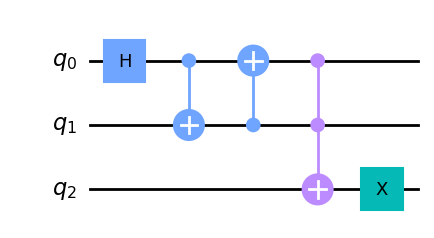

In [13]:

# 結果の出力
print("新しい量子回路:")
result[0].draw('mpl')

In [14]:
# 解説：

# # 関数judgeは、与えられたゲートが適用される前の量子ビットの状態に基づいて、量子回路にゲートを追加するかどうかを判断します。
# # target_qubitは、ゲートが作用するターゲット量子ビットのインデックスを取得します。これはゲート情報のリストの2番目の要素の最後の
# インデックスから取得します。
# # 関数はまず、ゲートがToffoliゲート（'ccx'または'rccx'）かどうかをチェックします。
# # もしゲートがToffoliゲートで、制御量子ビットの状態が'11'（両方とも1）ならば、ゲートは実質的にXゲート（NOTゲート）として作用します。
# そのため、bitstringsの長さ（つまり、制御量子ビットの状態）によって、新しいゲートが量子回路に追加されます。
# # bitstringsの長さが1（つまり、他に考慮する量子ビットの状態がない）場合、Xゲートがターゲット量子ビットに追加され、
# その深さがdepth_lsリストに追加されます。
# # bitstringsに'10'（一つ目の制御量子ビットが1で二つ目が0）が含まれていない場合、CNOTゲートが二つ目の制御量子ビットとターゲット
# 量子ビットに追加され、その深さがdepth_ls_tofリストに追加されます。
# # bitstringsに'01'（一つ目の制御量子ビットが0で二つ目が1）が含まれていない場合、CNOTゲートが一つ目の制御量子ビットとターゲット
# 量子ビットに追加され、その深さがdepth_ls_tofリストに追加されます。
# # 上記のどれも該当しない場合、Toffoliゲート自体が量子回路に追加されます。
# # 制御量子ビットの状態が'00'の場合、Toffoliゲートは実質的に何も行わないため、何も追加せず、その深さがdepth_lsリストに追加されます。
# # ゲートがToffoliゲートでない（つまり、二つの量子ビットに作用するゲート、例えばCNOTゲート）場合も同様の考察が行われます。
# ただし、この場合、ゲートは制御量子ビットの状態が1のときにターゲット量子ビットに影響を与えます。そのため、bitstringsに'1'が含まれているかどうかをチェックします。
# # '1'が含まれていて、かつ'0'が含まれていない場合、ゲートは実質的にその基底ゲートとして作用します（例えば、CNOTゲートは
# 実質的にXゲートとして作用します）。そのため、その基底ゲートがターゲット量子ビットに追加され、その深さがdepth_lsリストに追加されます。
# # '1'が含まれていて、かつ'0'も含まれている場合、ゲートはそのまま量子回路に追加されます。
# # '1'が含まれていない場合、ゲートは実質的に何も行わないため、何も追加せず、その深さがdepth_lsリストに追加されます。
# # 最終的に、更新された量子回路と深さのリストが返されます。







In [15]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_multivector

# 初期の量子回路を作成
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.cx(1,0)
qc.mcx([0,1],2)

# ゲートの一覧と各ゲートの実行後の状態を出力
for i, instruction in enumerate(qc.data):
    gate, qubits, _ = instruction

    # ゲートの実行前までの回路を作成
    partial_qc = QuantumCircuit(3)
    for j in range(i):
        partial_qc.data.append(qc.data[j])

    # 回路の状態ベクトルを取得
    backend = Aer.get_backend('statevector_simulator')
    result = execute(partial_qc, backend).result()
    statevector = result.get_statevector()

    # 状態ベクトルをビット文字列に変換
    bitstrings = [bin(i)[2:].zfill(3) for i in range(8) if abs(statevector[i]) > 1e-3]
    print(f"Gate: {gate.name}, Qubits: {qubits}, Bitstrings: {bitstrings}")


Gate: h, Qubits: [Qubit(QuantumRegister(3, 'q'), 0)], Bitstrings: ['000']
Gate: cx, Qubits: [Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1)], Bitstrings: ['000', '001']
Gate: cx, Qubits: [Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 0)], Bitstrings: ['000', '011']
Gate: ccx, Qubits: [Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)], Bitstrings: ['000', '010']
